In [7]:
# import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
%matplotlib inline

A50 = pd.read_csv('C:\\Winapps\\Python\\Scripts\\WD\\日盛A50.csv', engine='python')
A50.dropna(how='any',inplace=True)
A50.Date = pd.to_datetime(A50.Date)
A50.head()

In [46]:
# from min k to day k
import os
import pandas as pd

stock = A50.set_index('Date')
period_type = 'D'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_day'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_day'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_day'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_day'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_day'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  import sys
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  # Remove the CWD from sys.path while we load stuff.
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  # This is added back by InteractiveShellApp.init_path()
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() i

Date   Time    Open    High     Low   Close  Volume  open_day  \
0 2011-06-01  23:17  9150.0  9150.0  9150.0  9150.0     1.0    9245.0   
1 2011-06-02  22:27  8985.0  8985.0  8975.0  8975.0    15.0    9120.0   
2 2011-06-03  15:31  9030.0  9030.0  9030.0  9030.0     1.0    9010.0   
3 2011-06-07  22:47  9065.0  9065.0  9065.0  9065.0     2.0    9045.0   
4 2011-06-08  21:32  9050.0  9050.0  9050.0  9050.0     1.0    9095.0   

   close_day  high_day  low_day  volume_day  
0     9150.0    9245.0   9150.0      4159.0  
1     8975.0    9140.0   8940.0      6532.0  
2     9030.0    9095.0   8995.0      4071.0  
3     9065.0    9070.0   9000.0      2800.0  
4     9050.0    9095.0   8950.0      2718.0

In [173]:
# Over Yesterday
s = pd.Series(period_stock_data.index)
c = []
d = []
for i in period_stock_data.index:
    if i != 2441:
        c.append(period_stock_data.loc[i+1, 'close_day'] > period_stock_data.loc[i, 'high_day'])
        d.append(period_stock_data.loc[i+1, 'close_day'] < period_stock_data.loc[i, 'low_day'])
    else:
        break
print("Over yesterday high:%.2f"% ((sum(c)/2441)*100) + "%")
print("Over yesterday low:%.2f"% ((sum(d)/2441)*100) + "%")

Over yesterday high:23.31%
Over yesterday low:23.06%


In [34]:
# Growth rate_day_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close': period_stock_data.close_day})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

Close
Date                
2011-06-01       NaN
2011-06-02 -0.019311
2011-06-03  0.006109
2011-06-07  0.003868
2011-06-08 -0.001656

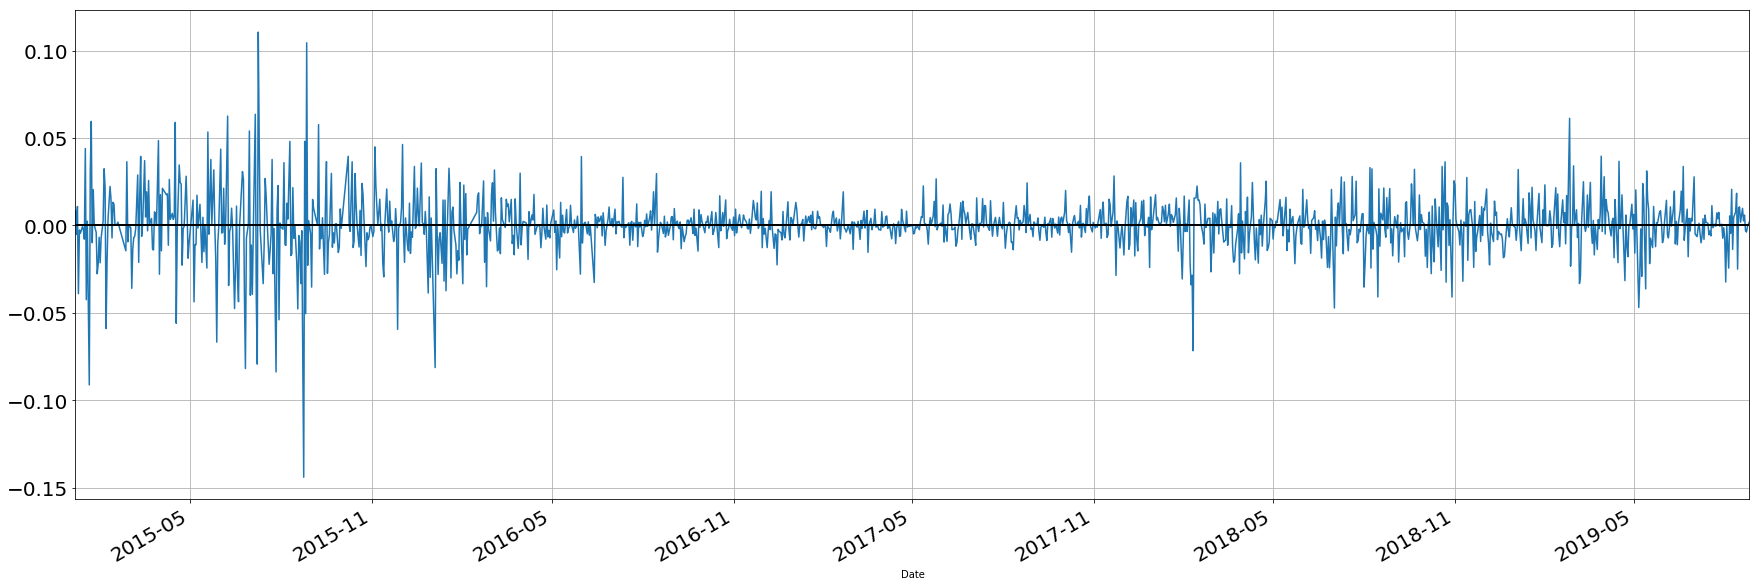

In [35]:
stock_change.loc['2015/01/01':].plot(grid = True,figsize = [30,10],
                                     fontsize = 20, legend = False).axhline(y = 0,color = "black", lw = 2)

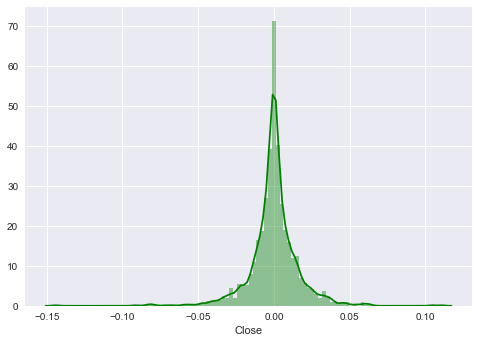

In [36]:
# Stock distribution_day_chage
import seaborn as sns
sns.distplot(stock_change.loc['2015/01/01':]['Close'],color='green',bins=100)

In [174]:
# from min k to week k
import os
import pandas as pd

stock = A50.set_index('Date')
period_type = 'W'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_week'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_week'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_week'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_week'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_week'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  import sys
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  # Remove the CWD from sys.path while we load stuff.
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  # This is added back by InteractiveShellApp.init_path()
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() i

Date   Time    Open    High     Low   Close  Volume  open_week  \
0 2011-06-05  15:31  9030.0  9030.0  9030.0  9030.0     1.0     9245.0   
1 2011-06-12  01:38  8870.0  8870.0  8870.0  8870.0     2.0     9045.0   
2 2011-06-19  00:44  8680.0  8680.0  8680.0  8680.0     2.0     8800.0   
3 2011-06-26  01:07  9170.0  9170.0  9170.0  9170.0     4.0     8735.0   
4 2011-07-03  15:25  9210.0  9230.0  9210.0  9230.0    75.0     9140.0   

   close_week  high_week  low_week  volume_week  
0      9030.0     9245.0    8940.0      14762.0  
1      8870.0     9095.0    8825.0      13746.0  
2      8680.0     9055.0    8640.0      22183.0  
3      9170.0     9235.0    8690.0      36707.0  
4      9230.0     9280.0    9045.0      44628.0

In [180]:
# Over last week
s = pd.Series(period_stock_data.index)
c = []
d = []
for i in period_stock_data.index:
    if i != 425:
        c.append(period_stock_data.loc[i+1, 'close_week'] > period_stock_data.loc[i, 'high_week'])
        d.append(period_stock_data.loc[i+1, 'close_week'] < period_stock_data.loc[i, 'low_week'])
    else:
        break
print("Over last week high:%.2f"% ((sum(c)/426)*100) + "%")
print("Over last week low:%.2f"% ((sum(d)/426)*100) + "%")

Over last week high:27.46%
Over last week low:22.07%


In [38]:
# Growth rate_week_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close': period_stock_data.close_week})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

Close
Date                
2011-06-05       NaN
2011-06-12 -0.017878
2011-06-19 -0.021653
2011-06-26  0.054916
2011-07-03  0.006522

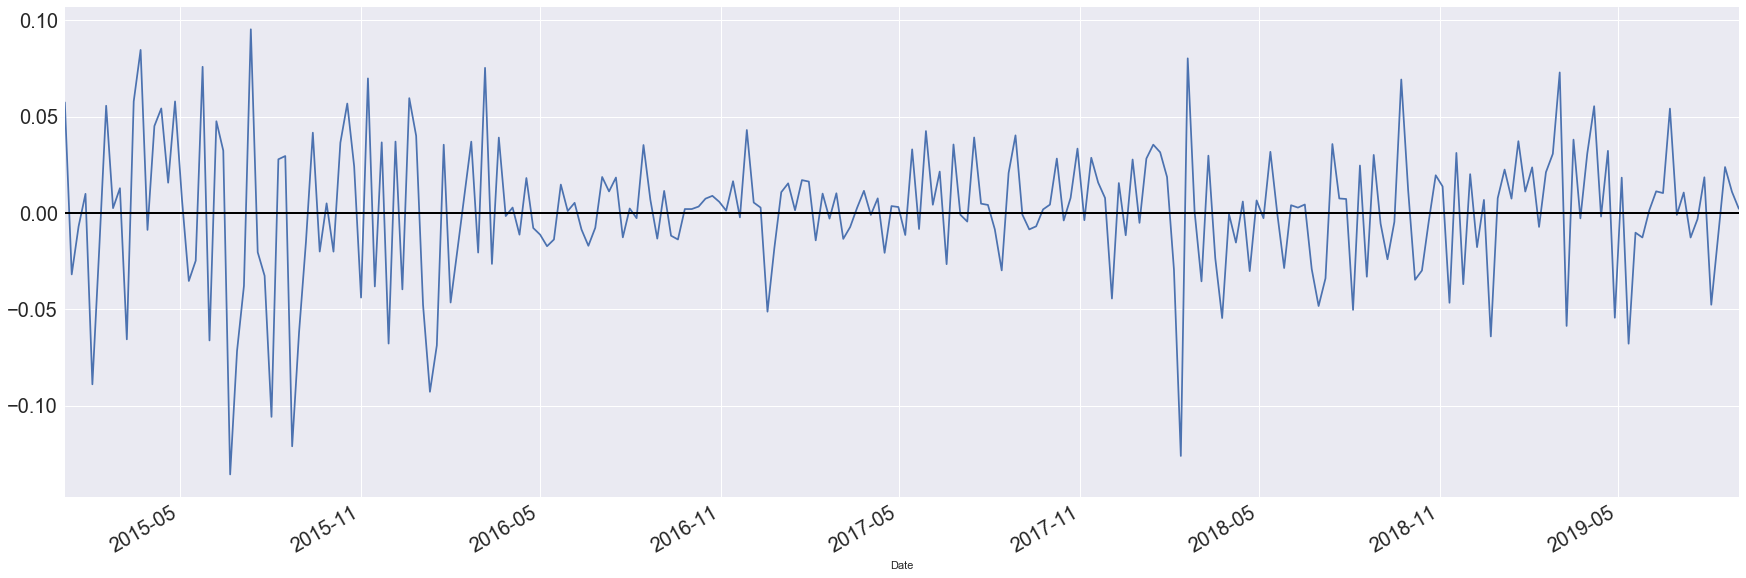

In [39]:
stock_change.loc['2015/01/01':].plot(grid = True,figsize = [30,10],
                                     fontsize = 20, legend = False).axhline(y = 0,color = "black", lw = 2)

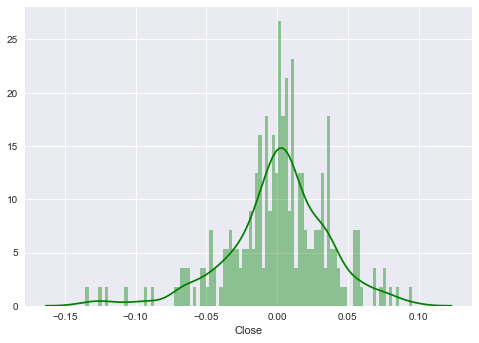

In [40]:
# Stock distribution_week_chage
import seaborn as sns
sns.distplot(stock_change.loc['2015/01/01':]['Close'],color='green',bins=100)

In [181]:
# from min k to month k
import os
import pandas as pd

stock = A50.set_index('Date')
period_type = 'M'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_month'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_month'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_month'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_month'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_month'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  import sys
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  # Remove the CWD from sys.path while we load stuff.
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  # This is added back by InteractiveShellApp.init_path()
C:\Winapps\Python\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() i

Date   Time    Open    High     Low   Close  Volume  open_month  \
0 2011-06-30  23:33  9200.0  9200.0  9200.0  9200.0       2      9245.0   
1 2011-07-31  21:48  8780.0  8780.0  8780.0  8780.0       1      9210.0   
2 2011-08-31  23:50  8555.0  8555.0  8555.0  8555.0       1      8855.0   
3 2011-09-30  15:31  7715.0  7715.0  7715.0  7715.0      61      8555.0   
4 2011-10-31  21:27  8245.0  8245.0  8245.0  8245.0       2      7790.0   

   close_month  high_month  low_month  volume_month  
0       9200.0      9280.0     8640.0        129830  
1       8780.0      9480.0     8710.0        133510  
2       8555.0      8980.0     7980.0        202719  
3       7715.0      8580.0     7705.0        176888  
4       8245.0      8550.0     7655.0        166794

In [184]:
# Over last month
s = pd.Series(period_stock_data.index)
c = []
d = []
for i in period_stock_data.index:
    if i != 98:
        c.append(period_stock_data.loc[i+1, 'close_month'] > period_stock_data.loc[i, 'high_month'])
        d.append(period_stock_data.loc[i+1, 'close_month'] < period_stock_data.loc[i, 'low_month'])
    else:
        break
print("Over last month high:%.2f"% ((sum(c)/99)*100) + "%")
print("Over last month low:%.2f"% ((sum(d)/99)*100) + "%")

Over last month high:26.26%
Over last month low:20.20%


In [43]:
# Growth rate_week_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close': period_stock_data.close_month})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

Close
Date                
2011-06-30       NaN
2011-07-31 -0.046727
2011-08-31 -0.025961
2011-09-30 -0.103349
2011-10-31  0.066440

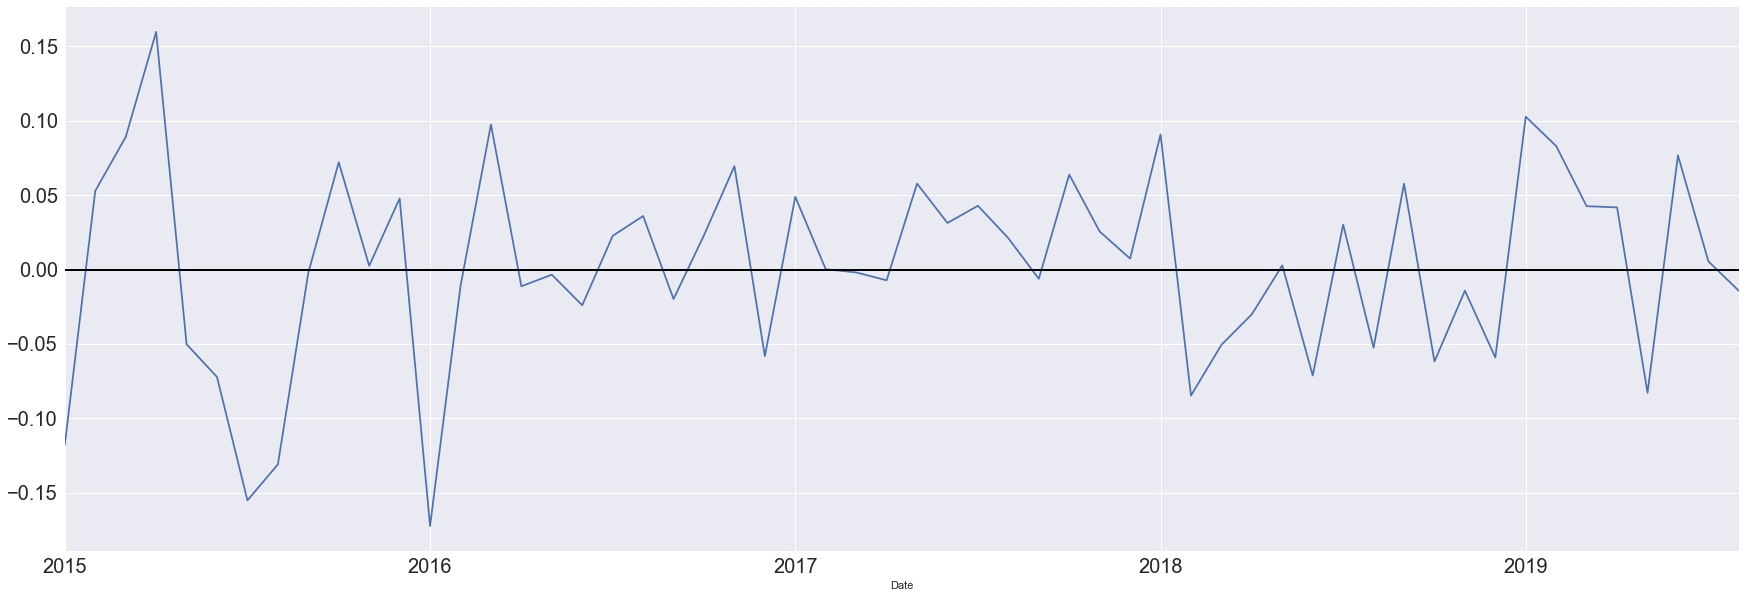

In [44]:
stock_change.loc['2015/01/01':].plot(grid = True,figsize = [30,10],
                                     fontsize = 20, legend = False).axhline(y = 0,color = "black", lw = 2)

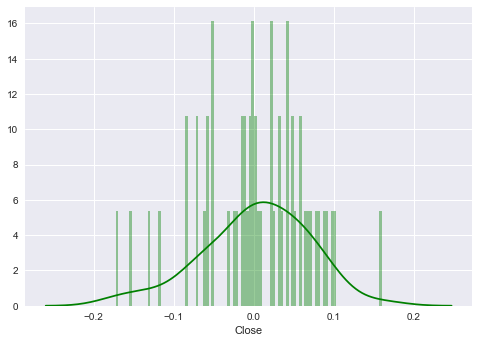

In [45]:
# Stock distribution_month_chage
import seaborn as sns
sns.distplot(stock_change.loc['2015/01/01':]['Close'],color='green',bins=100)